In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans



reg_season_detailed_pd = pd.read_csv('data/RegularSeasonDetailedResults.csv')
seasons_pd = pd.read_csv('data/Seasons.csv')
teams_pd = pd.read_csv('data/Teams.csv')
teamList = teams_pd['Team_Name'].tolist()
tourney_compact_pd = pd.read_csv('data/TourneyCompactResults.csv')
tourney_detailed_pd = pd.read_csv('data/TourneyDetailedResults.csv')
tourney_seeds_pd = pd.read_csv('data/TourneySeeds.csv')
tourney_seeds_pd.columns = ['Season', 'Seed', 'Team_Id']
tourney_slots_pd = pd.read_csv('data/TourneySlots.csv')
ncaa_tourney_compact_pd = pd.read_csv('data/NCAATourneyCompactResults.csv')
teams_pd_2 = pd.read_csv('data/Teams-2.csv')

In [10]:
reg_season_detailed_2017_pd = reg_season_detailed_pd[reg_season_detailed_pd['Season'] == 2017]
var_1 = reg_season_detailed_2017_pd.groupby(['Wteam']).agg(['count'])
var_2 = reg_season_detailed_2017_pd.groupby(['Lteam']).agg(['count'])
print(var_1.head(), var_2.head())

      Season Daynum Wscore Lteam Lscore  Wloc Numot  Wfgm  Wfga Wfgm3  ...   \
       count  count  count count  count count count count count count  ...    
Wteam                                                                  ...    
1101       9      9      9     9      9     9     9     9     9     9  ...    
1102      10     10     10    10     10    10    10    10    10    10  ...    
1103      25     25     25    25     25    25    25    25    25    25  ...    
1104      19     19     19    19     19    19    19    19    19    19  ...    
1105       2      2      2     2      2     2     2     2     2     2  ...    

      Lfga3  Lftm  Lfta   Lor   Ldr  Last   Lto  Lstl  Lblk   Lpf  
      count count count count count count count count count count  
Wteam                                                              
1101      9     9     9     9     9     9     9     9     9     9  
1102     10    10    10    10    10    10    10    10    10    10  
1103     25    25    25    

In [11]:
win_team = reg_season_detailed_2017_pd.groupby(['Wteam'], as_index=False).mean()
win_season_stats = []
for index, row in win_team.iterrows():
    win_season_stats.append([row['Wteam'], row['Wscore'], row['Lscore'], row['Wfgm'] / row['Wfga'] * 100, 
                         row['Wfga'], row['Wfga3'], row['Wfgm3'] / row['Wfga3'] * 100, 
                         row['Wftm'] / row['Wfta'] * 100, row['Wor'], row['Wdr'],
                         row['Wast'], row['Wto'], row['Wstl'], row['Wblk'], row['Wpf']])
win_season_stats = pd.DataFrame(win_season_stats)
win_season_stats.columns = ['team', 'for', 'against', 'fg%', 'fga', 'fga3', 'fg3%', 'ft%', 'or', 'dr', 'ast', 'to', 'stl', 'blk',
                       'pf']

lose_team = reg_season_detailed_2017_pd.groupby(['Lteam'], as_index=False).mean()
lose_season_stats = []
for index, row in lose_team.iterrows():
    lose_season_stats.append([row['Lteam'], row['Lscore'], row['Wscore'], row['Lfgm'] / row['Lfga'] * 100, 
                         row['Lfga'], row['Lfga3'], row['Lfgm3'] / row['Lfga3'] * 100, 
                         row['Lftm'] / row['Lfta'] * 100, row['Lor'], row['Ldr'],
                         row['Last'], row['Lto'], row['Lstl'], row['Lblk'], row['Lpf']])

lose_season_stats = pd.DataFrame(lose_season_stats)
lose_season_stats.columns = ['team', 'for', 'against', 'fg%', 'fga', 'fga3', 'fg3%', 'ft%', 'or', 'dr', 'ast', 'to', 'stl', 'blk',
                       'pf']
season_stats = win_season_stats.append(lose_season_stats)
season_stats = season_stats.groupby(['team'], as_index=False).mean()
season_stats.shape

(351, 15)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  if sys.path[0] == '':


         Team_Id
cluster         
0             23
1             25
2             24
3             24
4             19
5             16
6             20
7             24
8             25
9             17
10            36
11            28
12            24
13            16
14            30
         for   against       fg%       fga      fga3      fg3%       ft%  \
0   0.550170  0.457962  0.499136  0.508465  0.387425  0.531180  0.733111   
1   0.261975  0.331216  0.303664  0.394675  0.342191  0.389724  0.520875   
2   0.554635  0.466639  0.729348  0.427786  0.374575  0.706286  0.586226   
3   0.508750  0.436489  0.640534  0.399550  0.419705  0.679861  0.713615   
4   0.616346  0.508897  0.570105  0.643260  0.373147  0.459503  0.442256   
5   0.275225  0.235851  0.563411  0.257718  0.344630  0.595073  0.449960   
6   0.295304  0.254882  0.383812  0.411422  0.346002  0.373746  0.355824   
7   0.416624  0.317192  0.501976  0.446825  0.340131  0.464349  0.530579   
8   0.377006  0.380592  0.5

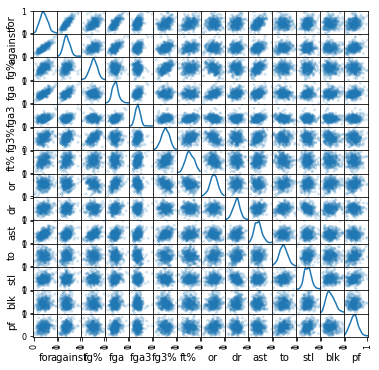

In [17]:
%matplotlib inline


num_clusters = 15
x = season_stats.drop(['team'], axis=1).values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
scaled_df = pd.DataFrame(x_scaled)
scaled_df.columns = ['for', 'against', 'fg%', 'fga', 'fga3', 'fg3%', 'ft%', 'or', 'dr', 'ast', 'to', 'stl', 'blk',
                       'pf']
from pandas.tools.plotting import scatter_matrix
scatter_matrix(scaled_df, alpha=0.2, figsize=(6, 6), diagonal='kde')
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(scaled_df)

cluster_map = pd.DataFrame()
cluster_map['Team_Id'] = season_stats.team.values
cluster_map['cluster'] = kmeans.labels_
print(cluster_map.groupby('cluster').count())
pairs = []
for i in range(0,num_clusters):
    for j in range(0,num_clusters):
        if(i != j):
            pairs.append([i, j])

percentages = np.zeros((num_clusters,num_clusters))
for pair in pairs:
    cluster_1_wins = reg_season_detailed_2017_pd[
        reg_season_detailed_2017_pd['Wteam'].isin(cluster_map[cluster_map['cluster'] == pair[0]].Team_Id) & 
        reg_season_detailed_2017_pd['Lteam'].isin(cluster_map[cluster_map['cluster'] == pair[1]].Team_Id)
    ]
    cluster_2_wins = reg_season_detailed_2017_pd[
        reg_season_detailed_2017_pd['Wteam'].isin(cluster_map[cluster_map['cluster'] == pair[1]].Team_Id) & 
        reg_season_detailed_2017_pd['Lteam'].isin(cluster_map[cluster_map['cluster'] == pair[0]].Team_Id)
    ]
    percentages[pair[0], pair[1]] = cluster_1_wins.shape[0] / (cluster_1_wins.shape[0] + cluster_2_wins.shape[0])
    percentages[pair[1], pair[0]] = cluster_2_wins.shape[0] / (cluster_1_wins.shape[0] + cluster_2_wins.shape[0])
centers = pd.DataFrame(kmeans.cluster_centers_)
centers.columns = ['for', 'against', 'fg%', 'fga', 'fga3', 'fg3%', 'ft%', 'or', 'dr', 'ast', 'to', 'stl', 'blk', 'pf']
centers['cluster'] = ['cluster ' + str(i) for i in centers.index]
centers.set_index(['cluster'])
centers.to_csv('test.csv')
pd.DataFrame(percentages).to_csv('test1.csv')
print(centers)
print(pd.DataFrame(percentages))
mm_teams = tourney_seeds_pd[tourney_seeds_pd['Season'] == 2017].Team_Id.values
mm_team_clusters = cluster_map[cluster_map['Team_Id'].isin(mm_teams)]
cluster_seeds = pd.merge(mm_team_clusters, tourney_seeds_pd[tourney_seeds_pd['Season'] == 2017])
team_cluster_seeds = pd.merge(cluster_seeds, teams_pd)
print(team_cluster_seeds.groupby('cluster')['Team_Name'].apply(lambda x: "%s" % ', '.join(x)).values)

In [ ]:
tourney_games = ncaa_tourney_compact_pd[ncaa_tourney_compact_pd['Season'] == 2017]
correct_games = 0
incorrect_games = 0
unknown_games = 0
print(cluster_map)
#tourney_games = tourney_games[4:36]
print(tourney_games.shape)
for index, game in tourney_games.iterrows():
    w_team_cluster = cluster_map[cluster_map['Team_Id'] == game['WTeamID']].cluster.values[0]
    l_team_cluster = cluster_map[cluster_map['Team_Id'] == game['LTeamID']].cluster.values[0]
    if percentages[w_team_cluster, l_team_cluster] >= 0.5:
        correct_games = correct_games + 1
    elif percentages [w_team_cluster, l_team_cluster] > 0:
        incorrect_games = incorrect_games + 1
        print(teams_pd[teams_pd_2['TeamID'] == game['WTeamID']].values[0],
              teams_pd[teams_pd_2['TeamID'] == game['LTeamID']].values[0],
              game['LTeamID'], percentages[w_team_cluster, l_team_cluster])
    
print (correct_games, incorrect_games)

In [ ]:
scaled_df.columns = ['score', 'fg%', 'fga', 'fga3', 'fg3%', 'ft%', 'or', 'dr', 'ast', 'to', 'stl', 'blk',
                       'pf']
data_label = scaled_df.join(cluster_map)
print(data_label.shape)
plt.figure(0)
plt.scatter(season_stats['team'], season_stats['score'])
plt.figure(1)
plt.scatter(data_label['score'], data_label['fg%'], c=data_label.cluster)
plt.xlabel('score')
plt.ylabel('fga')

In [ ]:
reg_season_detailed_pd.groupby(['Season'], as_index=False).mean()

In [ ]:

season_groupby = reg_season_detailed_pd.groupby(['Season'], as_index=False).mean()
#literature review, problem statement clearer, clusters, properties 
%matplotlib inline
plt.figure(0)
plt.plot(season_groupby['Season'], season_groupby['Wfgm3'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfgm3'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('3 fgm')
plt.figure(1)
plt.plot(season_groupby['Season'], season_groupby['Wfga3'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfga3'], label='loser', lw=2, marker='s') 
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('3 fga')
plt.figure(2)
plt.plot(season_groupby['Season'], season_groupby['Wfgm3']/season_groupby['Wfga3'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfgm3']/season_groupby['Lfga3'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('3 fg%')

In [ ]:
season_groupby = reg_season_detailed_pd.groupby(['Season'], as_index=False).mean()
#literature review, problem statement clearer, clusters, properties 
%matplotlib inline
plt.figure(0)
plt.plot(season_groupby['Season'], season_groupby['Wfgm'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfgm'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fgm')
plt.figure(1)
plt.plot(season_groupby['Season'], season_groupby['Wfga'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfga'], label='loser', lw=2, marker='s') 
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fga')
plt.figure(2)
plt.plot(season_groupby['Season'], season_groupby['Wfgm']/season_groupby['Wfga'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfgm']/season_groupby['Lfga'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fg%')

In [ ]:
%matplotlib inline
plt.figure(0)
plt.plot(season_groupby['Season'], season_groupby['Wfgm'] - season_groupby['Wfgm3'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfgm'] - season_groupby['Lfgm3'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('2 fgm')
plt.figure(1)
plt.plot(season_groupby['Season'], season_groupby['Wfga'] - season_groupby['Wfga3'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfga'] - season_groupby['Lfga3'], label='loser', lw=2, marker='s') 
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('2 fga')
plt.figure(2)
plt.plot(season_groupby['Season'], (season_groupby['Wfgm'] - season_groupby['Wfgm3'])/(season_groupby['Wfga'] - season_groupby['Wfga3']), label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], (season_groupby['Lfgm'] - season_groupby['Lfgm3'])/(season_groupby['Lfga'] - season_groupby['Lfga3']), label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('2 fg%')

In [ ]:
%matplotlib inline
plt.figure(0)
plt.plot(season_groupby['Season'], season_groupby['Wscore'], label='data1', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lscore'], label='data2', lw=2, marker='s')

In [ ]:
%matplotlib inline
columns = ['score', 'fgm', 'fga', 'fgm3', 'fga3', 'ftm', 'fta', 'or', 'dr', 'ast', 'to', 'stl', 'blk', 'pf']
for index, col in enumerate(columns):
    plt.figure(index)
    plt.plot(season_groupby['Season'], season_groupby['W' + col], label='winner', lw=2, marker='o')
    plt.plot(season_groupby['Season'], season_groupby['L' + col], label='loser', lw=2, marker='s')
    plt.legend(loc='best')
    plt.xlabel('season')
    plt.ylabel(col)
    
plt.figure(index + 1)
plt.plot(season_groupby['Season'], season_groupby['Wfgm'] - season_groupby['Wfgm3'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfgm'] - season_groupby['Lfgm3'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fgm2')
plt.figure(index + 2)
plt.plot(season_groupby['Season'], season_groupby['Wfga'] - season_groupby['Wfga3'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfga'] - season_groupby['Lfga3'], label='loser', lw=2, marker='s') 
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fga2')
plt.figure(index + 3)
plt.plot(season_groupby['Season'], (season_groupby['Wfgm'] - season_groupby['Wfgm3'])/(season_groupby['Wfga'] - season_groupby['Wfga3']), label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], (season_groupby['Lfgm'] - season_groupby['Lfgm3'])/(season_groupby['Lfga'] - season_groupby['Lfga3']), label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fg%2')
plt.figure(index + 4)
plt.plot(season_groupby['Season'], season_groupby['Wfgm']/season_groupby['Wfga'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfgm']/season_groupby['Lfga'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fg%')
plt.figure(index + 5)
plt.plot(season_groupby['Season'], season_groupby['Wfgm3']/season_groupby['Wfga3'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfgm3']/season_groupby['Lfga3'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fg%3')
plt.figure(index + 6)
plt.plot(season_groupby['Season'], season_groupby['Wftm']/season_groupby['Wfta'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lftm']/season_groupby['Lfta'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('ft%')

In [ ]:
%matplotlib inline
tournament_groupby = tourney_detailed_pd.groupby(['Season'], as_index=False).mean()
columns = ['score', 'fgm', 'fga', 'fgm3', 'fga3', 'ftm', 'fta', 'or', 'dr', 'ast', 'to', 'stl', 'blk', 'pf']
for index, col in enumerate(columns):
    plt.figure(index)
    plt.plot(tournament_groupby['Season'], tournament_groupby['W' + col], label='winner', lw=2, marker='o')
    plt.plot(tournament_groupby['Season'], tournament_groupby['L' + col], label='loser', lw=2, marker='s')
    plt.legend(loc='best')
    plt.xlabel('season')
    plt.ylabel(col)
    
plt.figure(index + 1)
plt.plot(tournament_groupby['Season'], tournament_groupby['Wfgm'] - tournament_groupby['Wfgm3'], label='winner', lw=2, marker='o')
plt.plot(tournament_groupby['Season'], tournament_groupby['Lfgm'] - tournament_groupby['Lfgm3'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fgm2')
plt.figure(index + 2)
plt.plot(tournament_groupby['Season'], tournament_groupby['Wfga'] - tournament_groupby['Wfga3'], label='winner', lw=2, marker='o')
plt.plot(tournament_groupby['Season'], tournament_groupby['Lfga'] - tournament_groupby['Lfga3'], label='loser', lw=2, marker='s') 
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fga2')
plt.figure(index + 3)
plt.plot(tournament_groupby['Season'], (tournament_groupby['Wfgm'] - tournament_groupby['Wfgm3'])/(tournament_groupby['Wfga'] - tournament_groupby['Wfga3']), label='winner', lw=2, marker='o')
plt.plot(tournament_groupby['Season'], (tournament_groupby['Lfgm'] - tournament_groupby['Lfgm3'])/(tournament_groupby['Lfga'] - tournament_groupby['Lfga3']), label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fg%2')
plt.figure(index + 4)
plt.plot(tournament_groupby['Season'], tournament_groupby['Wfgm']/tournament_groupby['Wfga'], label='winner', lw=2, marker='o')
plt.plot(tournament_groupby['Season'], tournament_groupby['Lfgm']/tournament_groupby['Lfga'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fg%')
plt.figure(index + 5)
plt.plot(tournament_groupby['Season'], tournament_groupby['Wfgm3']/tournament_groupby['Wfga3'], label='winner', lw=2, marker='o')
plt.plot(tournament_groupby['Season'], tournament_groupby['Lfgm3']/tournament_groupby['Lfga3'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fg%3')
plt.figure(index + 6)
plt.plot(tournament_groupby['Season'], tournament_groupby['Wftm']/tournament_groupby['Wfta'], label='winner', lw=2, marker='o')
plt.plot(tournament_groupby['Season'], tournament_groupby['Lftm']/tournament_groupby['Lfta'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('ft%')

In [ ]:
plt.figure(1)
plt.plot(season_groupby['Season'], season_groupby['Wfgm']/season_groupby['Wfga'], label='winner regular season', color='green', lw=1, marker='o')
plt.plot(tournament_groupby['Season'], tournament_groupby['Wfgm']/tournament_groupby['Wfga'], label='winner tournament', color='blue', lw=1, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfgm']/season_groupby['Lfga'], label='loser regular season', color='red', lw=1, marker='o')
plt.plot(tournament_groupby['Season'], tournament_groupby['Lfgm']/tournament_groupby['Lfga'], label='winner tournament', color='orange', lw=1, marker='o')
plt.legend(loc='best')
plt.title('Fields Goal Percentage by Season')
plt.xlabel('season')
plt.ylabel('fg%')
plt.figure(2)
plt.plot(season_groupby['Season'], season_groupby['Wfgm3']/season_groupby['Wfga3'], label='winner', color="green", lw=1, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfgm3']/season_groupby['Lfga3'], label='loser', color="red", lw=1, marker='o')
plt.legend(loc='best')
plt.title('3 Point Field Goal Percentage by Season')
plt.xlabel('season')
plt.ylabel('fg%3')
plt.figure(3)
plt.plot(season_groupby['Season'], season_groupby['Wfgm3'], label='winner', color="green", lw=1, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfgm3'], label='loser', color="red", lw=1, marker='o')
plt.legend(loc='best')
plt.title('3 Point Field Goals Made by Season')
plt.xlabel('season')
plt.ylabel('fgm3')
plt.figure(4)
plt.plot(season_groupby['Season'], season_groupby['Wfga3'], label='winner', color="green", lw=1, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfga3'], label='loser', color="red", lw=1, marker='o')
plt.legend(loc='best')
plt.title('3 Point Field Goals Attempted by Season')
plt.xlabel('season')
plt.ylabel('fga3')

In [ ]:
reg_season_detailed_years_pd = reg_season_detailed_pd[reg_season_detailed_pd['Season'].isin(['2017','2016','2015'])]
columns = ['score', 'fgm', 'fga', 'fg%', 'fgm3', 'fga3', 'fg%3', 'fgm2', 'fga2', 'fg%2',
           'ftm', 'fta', 'ft%', 'or', 'dr', 'ast', 'to', 'stl', 'blk', 'pf']
new_cols = []
for col in columns:
    new_cols.append("W" + col)
    new_cols.append("L" + col)
reg_season_detailed_years_pd['Wfgm2'] = reg_season_detailed_years_pd['Wfgm'] - reg_season_detailed_years_pd['Wfgm3']
reg_season_detailed_years_pd['Wfga2'] = reg_season_detailed_years_pd['Wfga'] - reg_season_detailed_years_pd['Wfga3']
reg_season_detailed_years_pd['Wfg%2'] = reg_season_detailed_years_pd['Wfgm2']/reg_season_detailed_years_pd['Wfga2']
reg_season_detailed_years_pd['Lfgm2'] = reg_season_detailed_years_pd['Lfgm'] - reg_season_detailed_years_pd['Lfgm3']
reg_season_detailed_years_pd['Lfga2'] = reg_season_detailed_years_pd['Lfga'] - reg_season_detailed_years_pd['Lfga3']
reg_season_detailed_years_pd['Lfg%2'] = reg_season_detailed_years_pd['Lfgm2']/reg_season_detailed_years_pd['Lfga2']
reg_season_detailed_years_pd['Wfg%'] = reg_season_detailed_years_pd['Wfgm']/reg_season_detailed_years_pd['Wfga']
reg_season_detailed_years_pd['Lfg%'] = reg_season_detailed_years_pd['Lfgm']/reg_season_detailed_years_pd['Lfga']
reg_season_detailed_years_pd['Wfg%3'] = reg_season_detailed_years_pd['Wfgm3']/reg_season_detailed_years_pd['Wfga3']
reg_season_detailed_years_pd['Lfg%3'] = reg_season_detailed_years_pd['Lfgm3']/reg_season_detailed_years_pd['Lfga3']
reg_season_detailed_years_pd['Wft%'] = reg_season_detailed_years_pd['Wftm']/reg_season_detailed_years_pd['Wfta']
reg_season_detailed_years_pd['Lft%'] = reg_season_detailed_years_pd['Lftm']/reg_season_detailed_years_pd['Lfta']
reg_season_detailed_years_pd = reg_season_detailed_years_pd.fillna(0)
x = reg_season_detailed_years_pd[new_cols].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

tournament_detailed_years_pd = tourney_detailed_pd[tourney_detailed_pd['Season'].isin(['2017','2016','2015'])]
columns = ['score', 'fgm', 'fga', 'fg%', 'fgm3', 'fga3', 'fg%3', 'fgm2', 'fga2', 'fg%2',
           'ftm', 'fta', 'ft%', 'or', 'dr', 'ast', 'to', 'stl', 'blk', 'pf']
new_cols = []
for col in columns:
    new_cols.append("W" + col)
    new_cols.append("L" + col)
tournament_detailed_years_pd['Wfgm2'] = tournament_detailed_years_pd['Wfgm'] - tournament_detailed_years_pd['Wfgm3']
tournament_detailed_years_pd['Wfga2'] = tournament_detailed_years_pd['Wfga'] - tournament_detailed_years_pd['Wfga3']
tournament_detailed_years_pd['Wfg%2'] = tournament_detailed_years_pd['Wfgm2']/tournament_detailed_years_pd['Wfga2']
tournament_detailed_years_pd['Lfgm2'] = tournament_detailed_years_pd['Lfgm'] - tournament_detailed_years_pd['Lfgm3']
tournament_detailed_years_pd['Lfga2'] = tournament_detailed_years_pd['Lfga'] - tournament_detailed_years_pd['Lfga3']
tournament_detailed_years_pd['Lfg%2'] = tournament_detailed_years_pd['Lfgm2']/tournament_detailed_years_pd['Lfga2']
tournament_detailed_years_pd['Wfg%'] = tournament_detailed_years_pd['Wfgm']/tournament_detailed_years_pd['Wfga']
tournament_detailed_years_pd['Lfg%'] = tournament_detailed_years_pd['Lfgm']/tournament_detailed_years_pd['Lfga']
tournament_detailed_years_pd['Wfg%3'] = tournament_detailed_years_pd['Wfgm3']/tournament_detailed_years_pd['Wfga3']
tournament_detailed_years_pd['Lfg%3'] = tournament_detailed_years_pd['Lfgm3']/tournament_detailed_years_pd['Lfga3']
tournament_detailed_years_pd['Wft%'] = tournament_detailed_years_pd['Wftm']/tournament_detailed_years_pd['Wfta']
tournament_detailed_years_pd['Lft%'] = tournament_detailed_years_pd['Lftm']/tournament_detailed_years_pd['Lfta']
tournament_detailed_years_pd = tournament_detailed_years_pd.fillna(0)
x_1 = tournament_detailed_years_pd[new_cols].values
min_max_scaler = preprocessing.MinMaxScaler()
x_1_scaled = min_max_scaler.fit_transform(x_1)

x_mean = np.mean(x_scaled, axis=0)
x_1_mean = np.mean(x_1_scaled, axis=0)
x_diff = x_mean - x_1_mean 
print(x_diff)
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(x_scaled)


In [ ]:
from pandas.tools.plotting import scatter_matrix
print(scaled_df)
scatter_matrix(scaled_df, alpha=0.2, figsize=(6, 6), diagonal='kde')